# CH04 Classification

### Logistic Regression

In [8]:
import numpy as np
import pandas as pd
import warnings
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, VotingRegressor, RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import xgboost as xgb
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
iris = load_iris()

In [3]:
# data, target , target_names, DESCR, feature_names, filename
data = iris.data
label = iris.target
columns =iris.feature_names
df = pd.DataFrame(data, columns=columns)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, shuffle=True, stratify=label, random_state=2019)

In [6]:
lr = LogisticRegression(verbose=1)

In [7]:
lr.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [8]:
pred = lr.predict(x_test)

In [9]:
# 로지스틸 회귀 정확도
accuracy_score(y_test, pred)

0.9666666666666667

In [10]:
# 계수(weight)
lr.coef_

array([[-0.4331758 ,  0.82135237, -2.39403865, -0.96776796],
       [ 0.49039201, -0.29955397, -0.15924469, -0.91532022],
       [-0.05721621, -0.5217984 ,  2.55328334,  1.88308818]])

In [11]:
# Bias
lr.intercept_

array([  9.79503679,   2.02943481, -11.8244716 ])

In [12]:
svc = SVC()

In [13]:
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
pred = svc.predict(x_test)

In [15]:
accuracy_score(y_test, pred)

0.9666666666666667

In [16]:
pred

array([1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 0, 1, 0, 0, 2, 2,
       1, 0, 1, 2, 1, 2, 1, 2])

In [17]:
y_test

array([1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 0, 1, 0, 0, 2, 2,
       1, 0, 1, 2, 1, 1, 1, 2])

In [18]:
dtc = DecisionTreeClassifier()

In [19]:
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_test)
accuracy_score(y_test, dtc_pred)

0.9666666666666667

In [20]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
dtr_pred = dtr.predict(x_test)
accuracy_score(y_test, dtr_pred)

0.9666666666666667

## Graphviz

In [21]:
export_graphviz(dtc, out_file="tree.dot", class_names=iris.target_names, feature_names=columns, impurity=True, filled=True)

In [22]:
with open("tree.dot") as f:
    dot_graph = f.read()

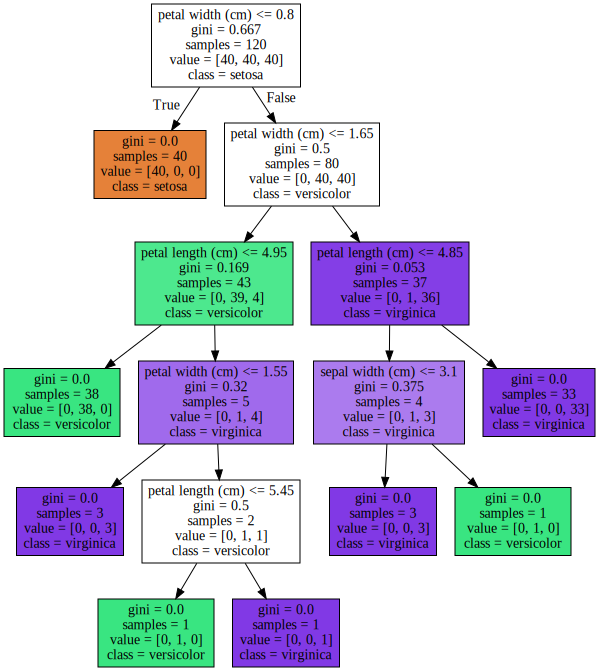

In [23]:
graphviz.Source(dot_graph)

# 제약조건
- max_depth = 3

In [24]:
dtc2 = DecisionTreeClassifier(max_depth = 3 , random_state = 156)

In [25]:
dtc2.fit(x_train, y_train)
pred_dtc2 = dtc2.predict(x_test)

In [26]:
accuracy_score(y_test, pred_dtc2)

0.9666666666666667

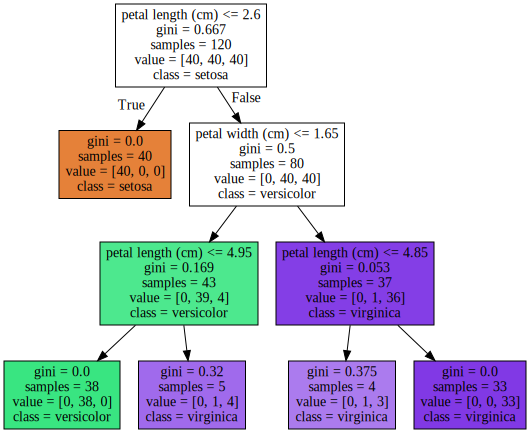

In [27]:
export_graphviz(dtc2, out_file="tree2.dot", class_names=iris.target_names, feature_names=columns, impurity=True, filled=True)
with open("tree2.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- min_samples_split = 4

In [28]:
dtc3 = DecisionTreeClassifier(min_samples_split=4 , random_state = 156)

In [29]:
dtc3.fit(x_train, y_train)
pred_dtc3 = dtc3.predict(x_test)

In [30]:
accuracy_score(y_test, pred_dtc3)

0.9666666666666667

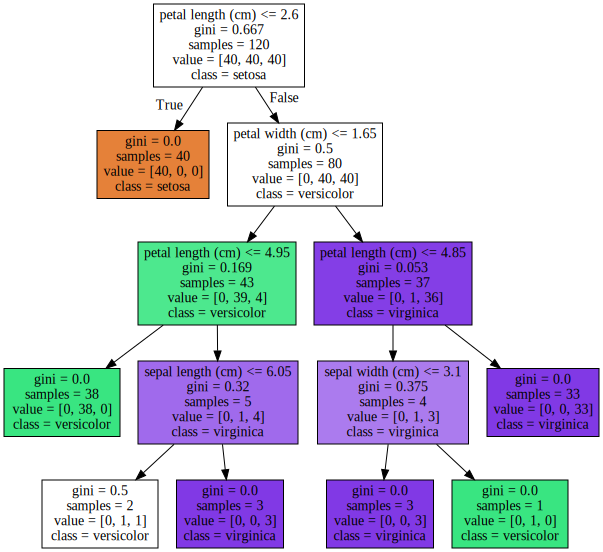

In [31]:
export_graphviz(dtc3, out_file="tree3.dot", class_names=iris.target_names, feature_names=columns, impurity=True, filled=True)
with open("tree3.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- min_samples_leaf = 4

In [32]:
dtc4 = DecisionTreeClassifier(min_samples_leaf=4 , random_state = 156)

In [33]:
dtc4.fit(x_train, y_train)
pred_dtc4 = dtc4.predict(x_test)

In [34]:
accuracy_score(y_test, pred_dtc3)

0.9666666666666667

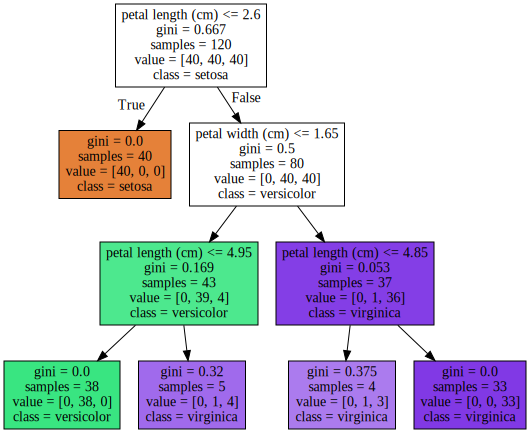

In [35]:
export_graphviz(dtc4, out_file="tree4.dot", class_names=iris.target_names, feature_names=columns, impurity=True, filled=True)
with open("tree4.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [36]:
dtc.feature_importances_

array([0.      , 0.01875 , 0.088772, 0.892478])

In [37]:
for name, value in zip(iris.feature_names, dtc.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

sepal length (cm) : 0.000
sepal width (cm) : 0.019
petal length (cm) : 0.089
petal width (cm) : 0.892


In [38]:
df = pd.DataFrame(dict(zip(['Name', 'NoneHypotheis', 'Hypothesis', 'Hypothsis2', 'Hypothesis3'],[iris.feature_names, dtc.feature_importances_, dtc2.feature_importances_, dtc3.feature_importances_, dtc4.feature_importances_] )))

In [39]:
df

,Name,NoneHypotheis,Hypothesis,Hypothsis2,Hypothesis3
0,sepal length (cm),0.000000,0.000000,0.007595,0.000000
1,sepal width (cm),0.018750,0.000000,0.018987,0.000000
2,petal length (cm),0.088772,0.599503,0.583567,0.599503
3,petal width (cm),0.892478,0.400497,0.389851,0.400497


# 보팅 분류기( Voting Classifier) - 앙상블

In [40]:
cancer = load_breast_cancer()

In [41]:
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [42]:
lr_clf = LogisticRegression()
knn_clf= KNeighborsClassifier(n_neighbors=8)

In [43]:
vo_clf = VotingClassifier(estimators = [('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

In [44]:
x_train,x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

In [45]:
vo_clf.fit(x_train, y_train)
pred = vo_clf.predict(x_test)
print('Voting Accuracy : {0:.4f}'.format(accuracy_score(y_test, pred)))

Voting Accuracy : 0.9474


In [46]:
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(x_train, y_train)
    pred =classifier.predict(x_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도 : 0.9386
KNeighborsClassifier 정확도 : 0.9386


## Random Forest

In [50]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0] + '_'+str(x[1]) if x[1]>0 else x[0], axis=1)
    
    new_feature_name_df = new_feature_name_df.drop(['index'], axis =1)
    return new_feature_name_df
    

In [54]:
def get_human_dataset():
    feature_name_df = pd.read_csv('./Human_Activate/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
    
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    x_train = pd.read_csv('./Human_Activate/train/X_train.txt', sep='\s+', names=feature_name)
    x_test = pd.read_csv('./Human_Activate/test/X_test.txt', sep='\s+', names=feature_name)
    
    y_train = pd.read_csv('./Human_Activate/train/y_train.txt', sep='\s+', header=None, names=['action'])    
    y_test = pd.read_csv('./Human_Activate/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    return x_train, x_test, y_train, y_test


In [55]:
x_train, x_test, y_train, y_test = get_human_dataset()

In [56]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)

In [57]:
print('Random Forest Accuracy : {0:.4f}'.format(accuracy))

Random Forest Accuracy : 0.9253


In [63]:
params = { 'n_estimators':[100], 'max_depth':[6,8,10,12], 'min_samples_leaf':[8,12,18], 'min_samples_split':[8,16,20]}

In [64]:
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(x_train, y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=0,
                                     

In [65]:
print('Best_Parametor : \n', grid_cv.best_params_)
print('Best Prediction : \n', grid_cv.best_score_)

Best_Parametor : 
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
Best Prediction : 
 0.9179815016322089


In [66]:
rf_clf1 = RandomForestClassifier(n_estimators = 300, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=8)

In [67]:
rf_clf1.fit(x_train, y_train)
pred = rf_clf1.predict(x_test)
print("Accuracy : {0:.4f}".format(accuracy_score(y_test, pred)))

Accuracy : 0.9186


In [70]:
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

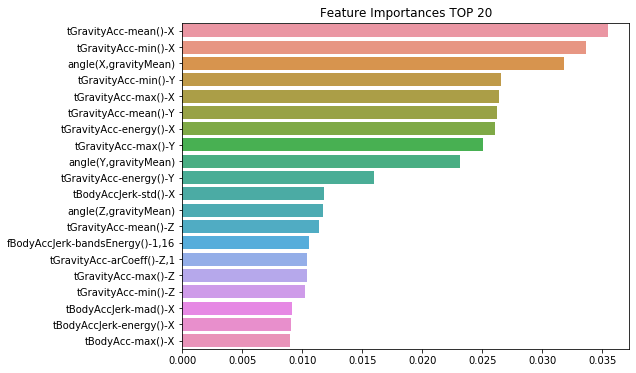

In [71]:
plt.figure(figsize=(8, 6))
plt.title('Feature Importances TOP 20')
sns.barplot(ftr_top20, ftr_top20.index)
plt.show()

In [74]:
x_train, x_test, y_train, y_test = get_human_dataset()

In [75]:
gb_clf = GradientBoostingClassifier(random_state=0, verbose=1)
gb_clf.fit(x_train, y_train)
gb_pred = gb_clf.predict(x_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM Accuracy : {0:.4f}'.format(gb_accuracy))

      Iter       Train Loss   Remaining Time 
         1       10340.3113            7.48m
         2        8582.2920            7.89m
         3        7283.1605            7.95m
         4        6276.5356            7.95m
         5        5457.5371            7.92m
         6        4785.1275            7.88m
         7        4227.2374            7.82m
         8        3736.9844            7.73m
         9        3350.6008            7.67m
        10        3000.1676            7.59m
        20        1220.7822            6.80m
        30         618.1201            5.97m
        40         378.4007            5.18m
        50         262.6745            4.33m
        60         190.7980            3.45m
        70         146.5356            2.58m
        80         116.6210            1.69m
        90          93.9275           50.00s
       100          77.9308            0.00s
GBM Accuracy : 0.9382


In [77]:
gb_clf

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=1,
                           warm_start=False)

# XGBoost(eXtra Gradient Boost)

In [13]:
dataset = load_breast_cancer()
x_features = dataset.data
y_label = dataset.target

In [15]:
cacner_df = pd.DataFrame(x_features, columns=dataset.feature_names)
cacner_df['target'] = y_label
cacner_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
